# Functional API

In [1]:
from keras import Input, layers

input_tensor = Input(shape=(32, ))
dense = layers.Dense(32, activation='relu')

output_tensor = dense(input_tensor)

Using TensorFlow backend.


In [2]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

In [3]:
seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64, )))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

In [5]:
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [11]:
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = Model(input_tensor, output_tensor)

In [12]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [13]:
unrelated_input = Input(shape=(32, ))
bad_model = Model(unrelated_input, output_tensor)

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_4:0", shape=(None, 64), dtype=float32) at layer "input_4". The following previous layers were accessed without issue: []

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [15]:
import numpy as np
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 0s 160us/step - loss: 12.2765
Epoch 2/10
1000/1000 [==============================] - 0s 9us/step - loss: 14.0237
Epoch 3/10
1000/1000 [==============================] - 0s 8us/step - loss: 16.4242
Epoch 4/10
1000/1000 [==============================] - 0s 8us/step - loss: 19.3923
Epoch 5/10
1000/1000 [==============================] - 0s 8us/step - loss: 22.4941
Epoch 6/10
1000/1000 [==============================] - 0s 8us/step - loss: 25.8326
Epoch 7/10
1000/1000 [==============================] - 0s 8us/step - loss: 29.4633
Epoch 8/10
1000/1000 [==============================] - 0s 9us/step - loss: 33.5672
Epoch 9/10
1000/1000 [==============================] - 0s 8us/step - loss: 38.3912
Epoch 10/10
1000/1000 [==============================] - 0s 8us/step - loss: 44.1735


In [16]:
score = model.evaluate(x_train, y_train)

1000/1000 [==============================] - 0s 38us/step


In [17]:
score

47.29479861450195

## 多入力モデル

In [18]:
from keras.models import Model
from keras import layers
from keras import Input

In [19]:
text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

In [24]:
text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(text_vocabulary_size, 64)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)

question_input = Input(shape=(None,), dtype='int32', name='question')
embedded_question = layers.Embedding(question_vocabulary_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)

answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)

In [25]:
model = Model([text_input, question_input], answer)

In [26]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [27]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, None)         0                                            
__________________________________________________________________________________________________
question (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 64)     640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, None, 32)     320000      question[0][0]                   
____________________________________________________________________________________________

In [28]:
import numpy as np
num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))

In [29]:
answers = np.zeros(shape=(num_samples, answer_vocabulary_size))
indices = np.random.randint(0, answer_vocabulary_size, size=num_samples)
for i, x in enumerate(answers):
    x[indices[i]] = 1

In [30]:
model.fit([text, question], answers, epochs=10, batch_size=128)

/home/koichiro_mori/miniconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 6.2145 - acc: 0.0020
Epoch 2/10
1000/1000 [==============================] - 1s 655us/step - loss: 6.1986 - acc: 0.0560
Epoch 3/10
1000/1000 [==============================] - 1s 658us/step - loss: 6.1698 - acc: 0.0320
Epoch 4/10
1000/1000 [==============================] - 1s 631us/step - loss: 6.0828 - acc: 0.0080
Epoch 5/10
1000/1000 [==============================] - 1s 633us/step - loss: 5.9907 - acc: 0.0110
Epoch 6/10
1000/1000 [==============================] - 1s 630us/step - loss: 5.8656 - acc: 0.0110
Epoch 7/10
1000/1000 [==============================] - 1s 640us/step - loss: 5.7621 - acc: 0.0110
Epoch 8/10
1000/1000 [==============================] - 1s 638us/step - loss: 5.6742 - acc: 0.0180
Epoch 9/10
1000/1000 [==============================] - 1s 632us/step - loss: 5.5912 - acc: 0.0180
Epoch 10/10
1000/1000 [==============================] - 1s 643us/step - loss: 5.5323 - acc: 0.0260


In [31]:
model.fit({'text': text, 'question': question}, answers, epochs=10, batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 1s 655us/step - loss: 5.4388 - acc: 0.0250
Epoch 2/10
1000/1000 [==============================] - 1s 637us/step - loss: 5.3776 - acc: 0.0390
Epoch 3/10
1000/1000 [==============================] - 1s 630us/step - loss: 5.3418 - acc: 0.0470
Epoch 4/10
1000/1000 [==============================] - 1s 610us/step - loss: 5.2538 - acc: 0.0530
Epoch 5/10
1000/1000 [==============================] - 1s 618us/step - loss: 5.1909 - acc: 0.0600
Epoch 6/10
1000/1000 [==============================] - 1s 629us/step - loss: 5.1252 - acc: 0.0590
Epoch 7/10
1000/1000 [==============================] - 1s 620us/step - loss: 5.0896 - acc: 0.0680
Epoch 8/10
1000/1000 [==============================] - 1s 614us/step - loss: 5.0259 - acc: 0.0660
Epoch 9/10
1000/1000 [==============================] - 1s 615us/step - loss: 4.9633 - acc: 0.0900
Epoch 10/10
1000/1000 [==============================] - 1s 619us/step - loss: 4.9595 - acc: 0.0830


## 多出力モデル

In [1]:
from keras import layers
from keras import Input
from keras.models import Model

Using TensorFlow backend.


In [2]:
vocabulary_size = 50000
num_income_groups = 10

In [7]:
posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(265, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, None, 50000)  12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, None, 128)    32000128    embedding_4[0][0]                
__________________________________________________________________________________________________
max_pooling1d_7 (MaxPooling1D)  (None, None, 128)    0           conv1d_16[0][0]                  
____________________________________________________________________________________________

In [11]:
model.compile(optimizer='rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
              loss_weights=[0.25, 1.0, 10.0])

In [12]:
model.compile(optimizer='rmsprop',
              loss={'age': 'mse', 'income': 'categorical_crossentropy', 'gender': 'binary_crossentropy'},
              loss_weights={'age': 0.25, 'income': 1.0, 'gender': 10.0})

In [34]:
from keras import layers

x = Input(shape=(256, 256, 3), dtype='float32')

branch_a = layers.Conv2D(128, 1, activation='relu', strides=2)(x)

branch_b = layers.Conv2D(128, 1, activation='relu')(x)
branch_b = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(branch_b)

branch_c = layers.AveragePooling2D(3, strides=2, padding='same')(x)
branch_c = layers.Conv2D(128, 3, activation='relu', padding='same')(branch_c)

branch_d = layers.Conv2D(128, 1, activation='relu')(x)
branch_d = layers.Conv2D(128, 3, activation='relu', padding='same')(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(branch_d)

output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)

In [36]:
output.shape

TensorShape([None, 128, 128, 512])

In [37]:
model = Model(x, output)

In [38]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_102 (Conv2D)             (None, 256, 256, 128 512         input_18[0][0]                   
__________________________________________________________________________________________________
conv2d_99 (Conv2D)              (None, 256, 256, 128 512         input_18[0][0]                   
__________________________________________________________________________________________________
average_pooling2d_14 (AveragePo (None, 128, 128, 3)  0           input_18[0][0]                   
____________________________________________________________________________________________

In [42]:
x = Input(shape=(256, 256, 128), dtype='float32')

y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)

y = layers.add([y, x])

model = Model(x, y)

In [43]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 256, 256, 128 0                                            
__________________________________________________________________________________________________
conv2d_111 (Conv2D)             (None, 256, 256, 128 147584      input_21[0][0]                   
__________________________________________________________________________________________________
conv2d_112 (Conv2D)             (None, 256, 256, 128 147584      conv2d_111[0][0]                 
__________________________________________________________________________________________________
conv2d_113 (Conv2D)             (None, 256, 256, 128 147584      conv2d_112[0][0]                 
____________________________________________________________________________________________

In [48]:
x = Input(shape=(256, 256, 128), dtype='float32')

y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.MaxPooling2D(2, strides=2)(y)

residual = layers.Conv2D(128, 1, strides=2, padding='same')(x)

y = layers.add([y, residual])

model = Model(x, y)

In [45]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 256, 256, 128)     0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 256, 256, 128)     147584    
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 256, 256, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 128)     0         
Total params: 295,168
Trainable params: 295,168
Non-trainable params: 0
_________________________________________________________________


In [49]:
from keras import layers
from keras import Input
from keras.models import Model

In [56]:
lstm = layers.LSTM(32)

left_input = Input(shape=(None, 128))
left_output = lstm(left_input)

right_input = Input(shape=(None, 128))
right_output = lstm(right_input)

merged = layers.concatenate([left_output, right_output], axis=-1)
predictions = layers.Dense(1, activation='sigmoid')(merged)

In [59]:
model = Model([left_input, right_input], predictions)

In [60]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           (None, None, 128)    0                                            
__________________________________________________________________________________________________
input_35 (InputLayer)           (None, None, 128)    0                                            
__________________________________________________________________________________________________
lstm_7 (LSTM)                   (None, 32)           20608       input_34[0][0]                   
                                                                 input_35[0][0]                   
__________________________________________________________________________________________________
concatenate_15 (Concatenate)    (None, 64)           0           lstm_7[0][0]               

In [61]:
from keras import layers
from keras import applications
from keras import Input

In [62]:
xception_base = applications.Xception(weights=None, include_top=False)

left_input = Input(shape=(250, 250, 3))
right_input = Input(shape=(250, 250, 3))

left_features = xception_base(left_input)
right_features = xception_base(right_input)

merged_features = layers.concatenate([left_features, right_features], axis=-1)

In [64]:
merged_features.shape

TensorShape([None, 8, 8, 4096])

## Callbacks

In [67]:
import keras

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_acc', patience=1),
    keras.callbacks.ModelCheckpoint(filepath='my_model.h5', monitor='val_loss', save_best_only=True)
]

## Tensorboard

In [68]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 2000
max_len = 500

In [69]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [70]:
model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len, name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
________________________________________________

In [73]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [74]:
mkdir my_log_dir

In [76]:
callbacks = [
    keras.callbacks.TensorBoard(log_dir='my_log_dir', histogram_freq=1, embeddings_freq=1)
]

In [77]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=callbacks)

/home/koichiro_mori/miniconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 8s 423us/step - loss: 0.6468 - acc: 0.6364 - val_loss: 0.4205 - val_acc: 0.8344
Epoch 2/20
20000/20000 [==============================] - 8s 403us/step - loss: 0.4527 - acc: 0.8014 - val_loss: 0.4149 - val_acc: 0.8246
Epoch 3/20
20000/20000 [==============================] - 8s 402us/step - loss: 0.3844 - acc: 0.7954 - val_loss: 0.4558 - val_acc: 0.7938
Epoch 4/20
20000/20000 [==============================] - 8s 402us/step - loss: 0.3397 - acc: 0.7646 - val_loss: 0.6955 - val_acc: 0.6786
Epoch 5/20
20000/20000 [==============================] - 8s 403us/step - loss: 0.2911 - acc: 0.7210 - val_loss: 0.5738 - val_acc: 0.6878
Epoch 6/20
20000/20000 [==============================] - 8s 402us/step - loss: 0.2338 - acc: 0.6920 - val_loss: 0.6333 - val_acc: 0.6300
Epoch 7/20
20000/20000 [==============================] - 8s 403us/step - loss: 0.2188 - acc: 0.6236 - val_loss: 0.8729 - v

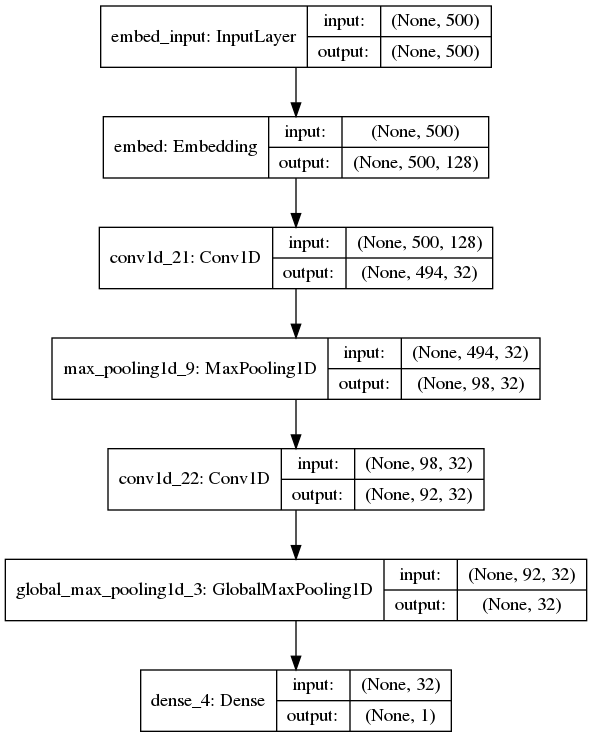

In [78]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')